In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("data.csv")
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
data.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.columns.values

array(['Bankrupt?',
       ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)',
       ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share',
       ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Op

Altman formula for emerging market
Z’ = 0,717∙X1+0,847∙X+3,107∙X3+0,42∙X4+0,998∙X5

### Visualization

Text(0.5, 1.0, 'Target: Bankruptcy')

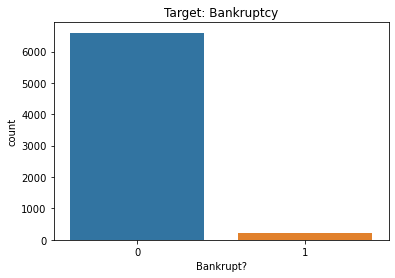

In [7]:
sns.countplot(x=data['Bankrupt?'])
plt.title("Target: Bankruptcy")

### Calculation of  z score

In [8]:
def calc_zscore(args):
    x1,x2,x3,x4,x5 = args
    z=0.717*x1 +0.847*x2 + 0.3107*x3 + 0.42*x4 + 0.998*x5
    return z

In [9]:
X1 = data.loc[0," Working Capital to Total Assets"]
X2 = data.loc[0," Retained Earnings to Total Assets"]
X3 = data.loc[0," ROA(C) before interest and depreciation before interest"]
X4 = data.loc[0," Equity to Liability"]
X5 = data.loc[0," Total Asset Turnover"]



In [10]:
mytuple =(X1,X2,X3,X4,X5)
print(mytuple)

(0.67277529248986, 0.903224771166726, 0.370594257300249, 0.0164687409123162, 0.0869565217391304)


In [11]:
calc_zscore(mytuple)

1.456254381515459

In [12]:
data_zscore = pd.DataFrame(data = data,columns=["Bankrupt?"," Working Capital to Total Assets",
                                               " Retained Earnings to Total Assets",
                                  " ROA(C) before interest and depreciation before interest", 
                                   " Equity to Liability"," Total Asset Turnover"
                                  ])

In [13]:
data_zscore

,Bankrupt?,Working Capital to Total Assets,Retained Earnings to Total Assets,ROA(C) before interest and depreciation before interest,Equity to Liability,Total Asset Turnover
0,1,0.672775,0.903225,0.370594,0.016469,0.086957
1,1,0.751111,0.931065,0.464291,0.020794,0.064468
2,1,0.829502,0.909903,0.426071,0.016474,0.014993
3,1,0.725754,0.906902,0.399844,0.023982,0.089955
4,1,0.751822,0.913850,0.465022,0.035490,0.175412
...,...,...,...,...,...,...
6814,0,0.817769,0.925611,0.493687,0.029890,0.103448
6815,0,0.793387,0.932629,0.475162,0.038284,0.103448
6816,0,0.866047,0.932000,0.472725,0.097649,0.106447
6817,0,0.832340,0.939613,0.506264,0.044009,0.109445


In [14]:
for i in range(len(data_zscore)):
    lt=data_zscore.iloc[i,1:6]
    #print(lt)
    mytuple = tuple(lt)
    #print(len(mytuple))
    data_zscore.loc[i,"zscore"] = calc_zscore(mytuple)
    
    

In [15]:
data_zscore.head(10)

,Bankrupt?,Working Capital to Total Assets,Retained Earnings to Total Assets,ROA(C) before interest and depreciation before interest,Equity to Liability,Total Asset Turnover,zscore
0,1,0.672775,0.903225,0.370594,0.016469,0.086957,1.456254
1,1,0.751111,0.931065,0.464291,0.020794,0.064468,1.544486
2,1,0.829502,0.909903,0.426071,0.016474,0.014993,1.519703
3,1,0.725754,0.906902,0.399844,0.023982,0.089955,1.512591
4,1,0.751822,0.913850,0.465022,0.035490,0.175412,1.647538
5,1,0.686729,0.903041,0.388680,0.019534,0.095952,1.481988
6,0,0.729416,0.911441,0.390923,0.015663,0.100450,1.523270
7,0,0.797005,0.935449,0.508361,0.034889,0.218891,1.754832
8,0,0.813738,0.935200,0.488519,0.065826,0.154423,1.709108
9,0,0.825696,0.938290,0.495686,0.030801,0.347826,1.900832


In [16]:
data2 = data.filter(regex="Flag|flag")
data2

,Liability-Assets Flag,Net Income Flag
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
6814,0,1
6815,0,1
6816,0,1
6817,0,1


In [17]:
data_ratio = data.filter(regex="ratio|Ratio")
data_ratio

,Total Asset Return Growth Rate Ratio,Current Ratio,Quick Ratio,Interest Expense Ratio,Debt ratio %,Long-term fund suitability ratio (A),Interest Coverage Ratio (Interest expense to EBIT)
0,0.263100,0.002259,0.001208,0.629951,0.207576,0.005024,0.564050
1,0.264516,0.006016,0.004039,0.635172,0.171176,0.005059,0.570175
2,0.264184,0.011543,0.005348,0.629631,0.207516,0.005100,0.563706
3,0.263371,0.004194,0.002896,0.630228,0.151465,0.005047,0.564663
4,0.265218,0.006022,0.003727,0.636055,0.106509,0.005303,0.575617
...,...,...,...,...,...,...,...
6814,0.264517,0.010451,0.005457,0.631415,0.124618,0.005150,0.566193
6815,0.264730,0.009259,0.006741,0.631489,0.099253,0.006772,0.566018
6816,0.263858,0.038424,0.035112,0.630612,0.038939,0.009149,0.565158
6817,0.264409,0.012782,0.007256,0.630731,0.086979,0.005529,0.565302


In [18]:
X=pd.DataFrame()
X = data_ratio.copy()
X = X.join(data_zscore["zscore"])
X.head()

,Total Asset Return Growth Rate Ratio,Current Ratio,Quick Ratio,Interest Expense Ratio,Debt ratio %,Long-term fund suitability ratio (A),Interest Coverage Ratio (Interest expense to EBIT),zscore
0,0.263100,0.002259,0.001208,0.629951,0.207576,0.005024,0.564050,1.456254
1,0.264516,0.006016,0.004039,0.635172,0.171176,0.005059,0.570175,1.544486
2,0.264184,0.011543,0.005348,0.629631,0.207516,0.005100,0.563706,1.519703
3,0.263371,0.004194,0.002896,0.630228,0.151465,0.005047,0.564663,1.512591
4,0.265218,0.006022,0.003727,0.636055,0.106509,0.005303,0.575617,1.647538


In [19]:
X.describe()

,Total Asset Return Growth Rate Ratio,Current Ratio,Quick Ratio,Interest Expense Ratio,Debt ratio %,Long-term fund suitability ratio (A),Interest Coverage Ratio (Interest expense to EBIT),zscore
count,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.264248,4.032850e+05,8.376595e+06,0.630991,0.113177,0.008783,0.565358,1.693711
std,0.009634,3.330216e+07,2.446847e+08,0.011238,0.053920,0.028153,0.013214,0.132806
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.644617
25%,0.263759,7.555047e-03,4.725903e-03,0.630612,0.072891,0.005244,0.565158,1.607080
50%,0.264050,1.058717e-02,7.412472e-03,0.630698,0.111407,0.005665,0.565252,1.679430
75%,0.264388,1.626953e-02,1.224911e-02,0.631125,0.148804,0.006847,0.565725,1.762763
max,1.000000,2.750000e+09,9.230000e+09,1.000000,1.000000,1.000000,1.000000,2.598188


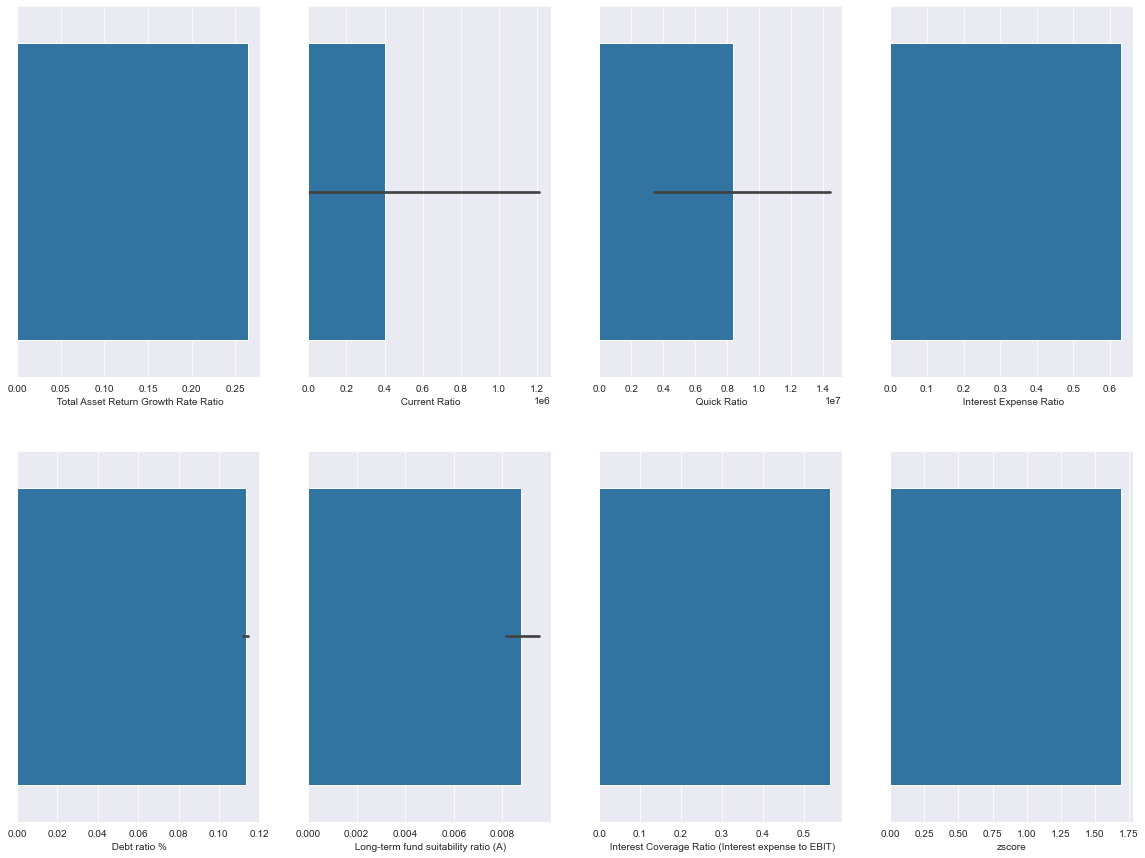

In [20]:
sns.set_style("darkgrid")
fig, axs = plt.subplots(2,4, figsize=(20,15))
k=0
for i in range(2):
    for j in range(4):
        sns.barplot(ax=axs[i,j],data = X, x=X.iloc[:,k])
        #axs[i,j].set_title(X.columns.values[k])
        k=k+1


Standardised the independent values

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler=StandardScaler()
X_scale=scaler.fit_transform(X)

In [23]:
X1 = pd.DataFrame(X_scale, columns=X.columns.values)
X1

,Total Asset Return Growth Rate Ratio,Current Ratio,Quick Ratio,Interest Expense Ratio,Debt ratio %,Long-term fund suitability ratio (A),Interest Coverage Ratio (Interest expense to EBIT),zscore
0,-0.119118,-0.012111,-0.034237,-0.092520,1.750845,-0.133505,-0.098978,-1.788129
1,0.027847,-0.012111,-0.034237,0.372093,1.075727,-0.132282,0.364559,-1.123712
2,-0.006595,-0.012111,-0.034237,-0.120983,1.749724,-0.130825,-0.125015,-1.310339
3,-0.090968,-0.012111,-0.034237,-0.067866,0.710131,-0.132707,-0.052562,-1.363894
4,0.100765,-0.012111,-0.034237,0.450626,-0.123674,-0.123599,0.776395,-0.347702
...,...,...,...,...,...,...,...,...
6814,0.028009,-0.012111,-0.034237,0.037728,0.212203,-0.129029,0.063215,-0.408100
6815,0.050110,-0.012111,-0.034237,0.044310,-0.258249,-0.071439,0.049970,-0.511779
6816,-0.040473,-0.012111,-0.034237,-0.033705,-1.376904,0.013009,-0.015101,0.081107
6817,0.016716,-0.012111,-0.034237,-0.023160,-0.485905,-0.115599,-0.004270,-0.120970


In [24]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
sns.set(style='darkgrid', color_codes=True)
from imblearn.over_sampling import SMOTE

In [31]:
x = X1
y = data_zscore["Bankrupt?"]

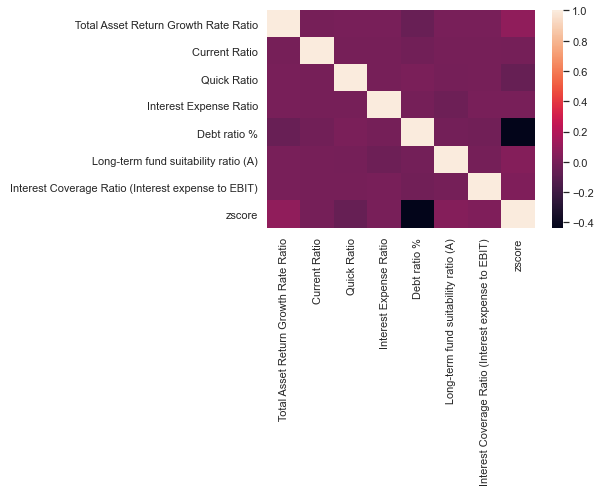

In [50]:
sns.heatmap(x.corr())
plt.show()

The recall of minority class will be 0 because the number of observation is very small as compare to majority class. Therefore the model is more biased toward the majority class. Hence, SMOTE technique is used to account for the imbalance

In [32]:
oversample = SMOTE(random_state=0)
x,y = oversample.fit_resample(x,y)

<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

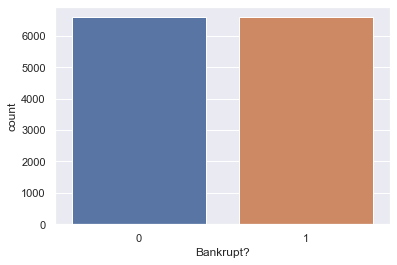

In [34]:
#To check 
sns.countplot(x =y)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state =0 )

In [36]:
y_train

11802    1
1361     0
6260     0
10442    1
4014     0
        ..
13123    1
3264     0
9845     1
10799    1
2732     0
Name: Bankrupt?, Length: 9238, dtype: int64

In [37]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [52]:
y_pred = logreg.predict(X_test)
score = logreg.score(X_test, y_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(score))

Accuracy of logistic regression classifier on test set: 0.86


In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1628  297]
 [ 254 1781]]


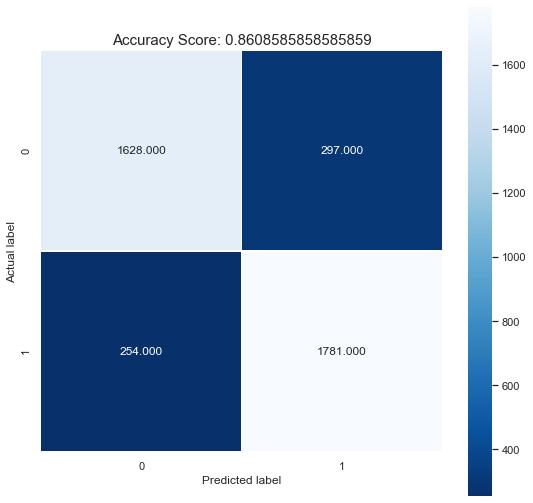

In [53]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1925
           1       0.86      0.88      0.87      2035

    accuracy                           0.86      3960
   macro avg       0.86      0.86      0.86      3960
weighted avg       0.86      0.86      0.86      3960



### Explanation: 
    precision = number of true positives/(number of true positives + number of false positive)
    Recall    = number of true positives/(number of true positives + number of false negatives)
                Ability of classifier to find all positive samples. Also known as true posiitve rate
    f1-score  = harmonic weighted average of precison and recall. 
                Ranges between 0 and 1 where 1 is the best value and 0 is the worst
    support   = number of occurence of each class in y_test 

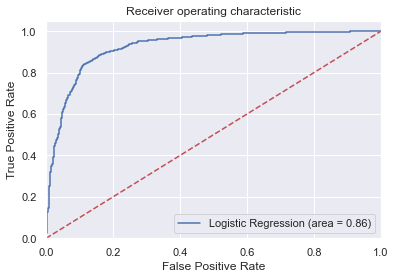

In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [59]:
result = pd.DataFrame(y_test,index=y_test.index)
result[" Bankrupt?_pred"] = y_pred

In [60]:
result

,Bankrupt?,Bankrupt?_pred
3744,0,0
9458,1,1
2875,0,0
3232,0,0
499,0,0
...,...,...
7041,1,0
6667,0,0
11377,1,1
7129,1,1
